<a href="https://colab.research.google.com/github/laxmiprasanna1508/credit-card-fuard-detition/blob/main/prasanna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# -----------------------------
# Basic libraries
# -----------------------------
import pandas as pd
import numpy as np

# -----------------------------
# Visualization libraries
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Machine learning / classifiers
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# -----------------------------
# Imbalanced data handling
# -----------------------------
from imblearn.over_sampling import SMOTE

# -----------------------------
# Utility
# -----------------------------
import warnings
warnings.filterwarnings("ignore")


In [44]:
# Load the dataset
df = pd.read_csv("creditcard.csv", sep=',', engine='python', on_bad_lines='skip')

In [53]:
print("Training Decision Tree Classifier...")

# Initialize and train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

print("Decision Tree Classifier Training Complete.")

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nDecision Tree Accuracy Score:")
print(accuracy_score(y_test, y_pred_dt))

Training Decision Tree Classifier...
Decision Tree Classifier Training Complete.

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    152986
         1.0       0.72      0.90      0.80       281

    accuracy                           1.00    153267
   macro avg       0.86      0.95      0.90    153267
weighted avg       1.00      1.00      1.00    153267


Decision Tree Confusion Matrix:
[[152886    100]
 [    29    252]]

Decision Tree Accuracy Score:
0.9991583315390788


In [56]:
print("Training Random Forest Classifier...")

# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

print("Random 2Forest Classifier Training Complete.")

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

Training Random Forest Classifier...
Random Forest Classifier Training Complete.

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    152986
         1.0       0.98      0.92      0.95       281

    accuracy                           1.00    153267
   macro avg       0.99      0.96      0.98    153267
weighted avg       1.00      1.00      1.00    153267


Random Forest Confusion Matrix:
[[152982      4]
 [    22    259]]

Random Forest Accuracy Score:
0.9998303613954732


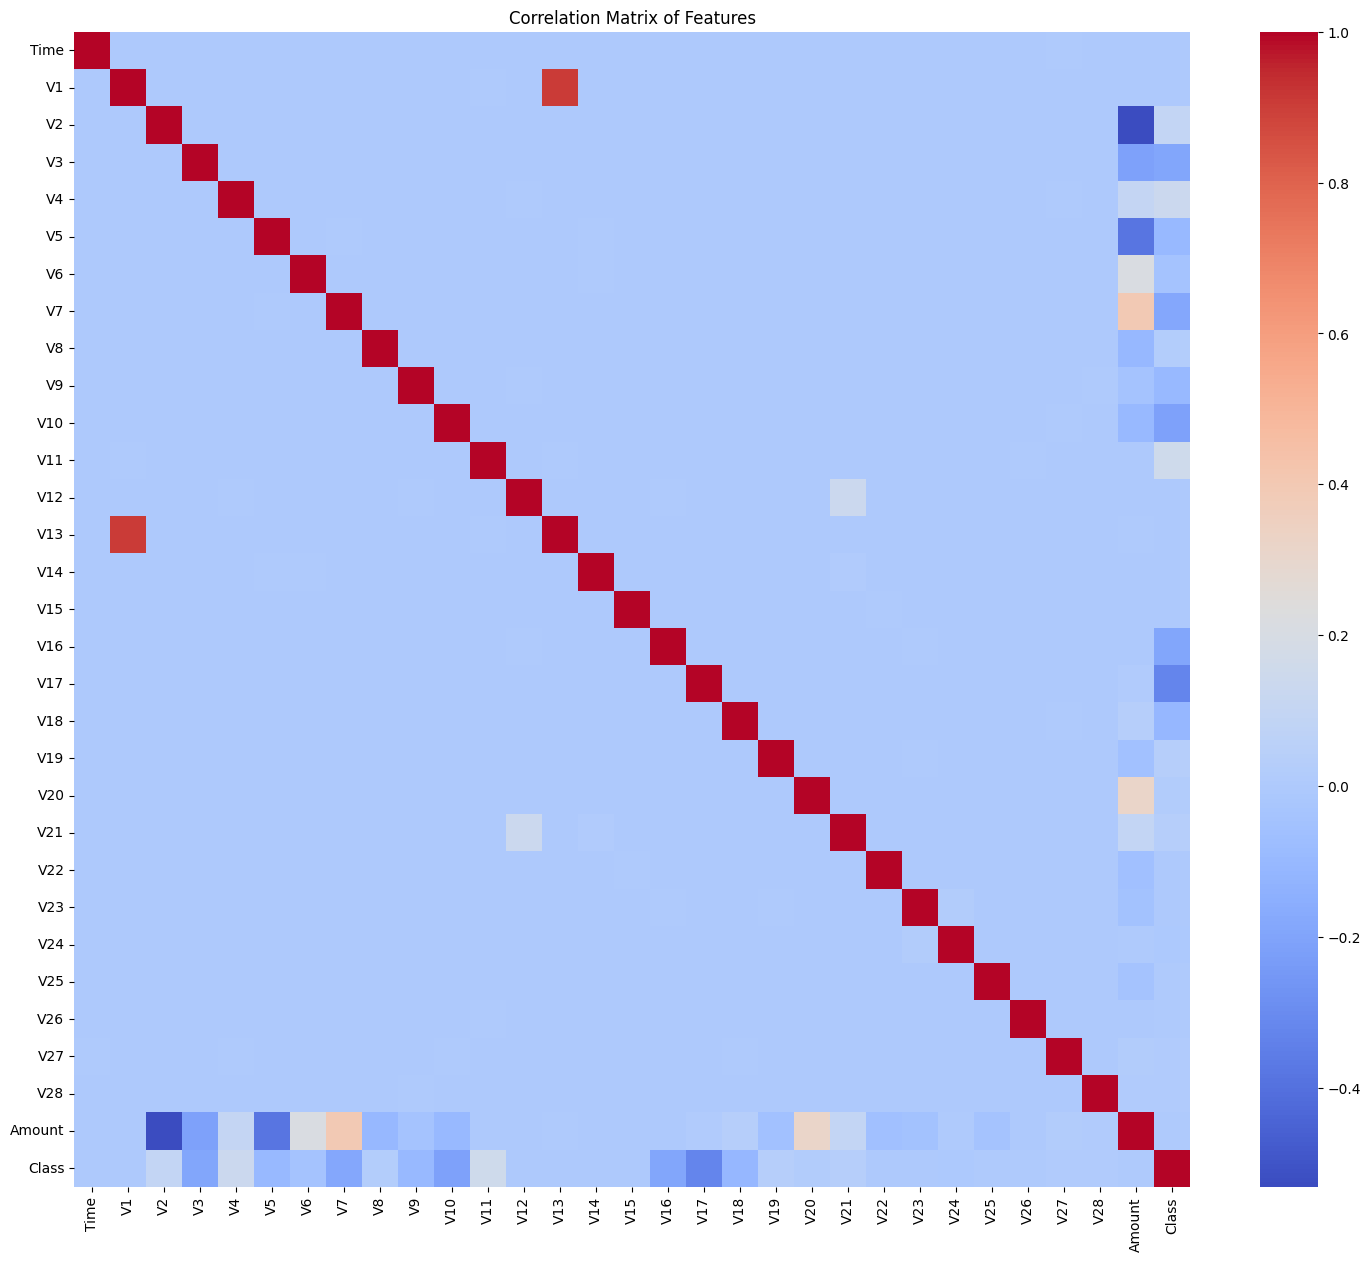

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

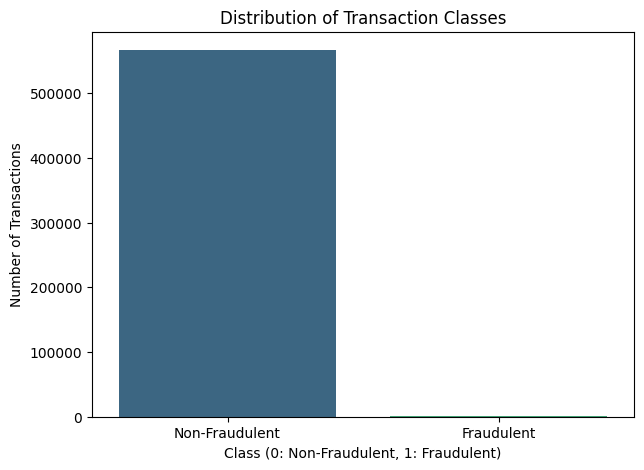

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the 'Class' variable
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Distribution of Transaction Classes')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

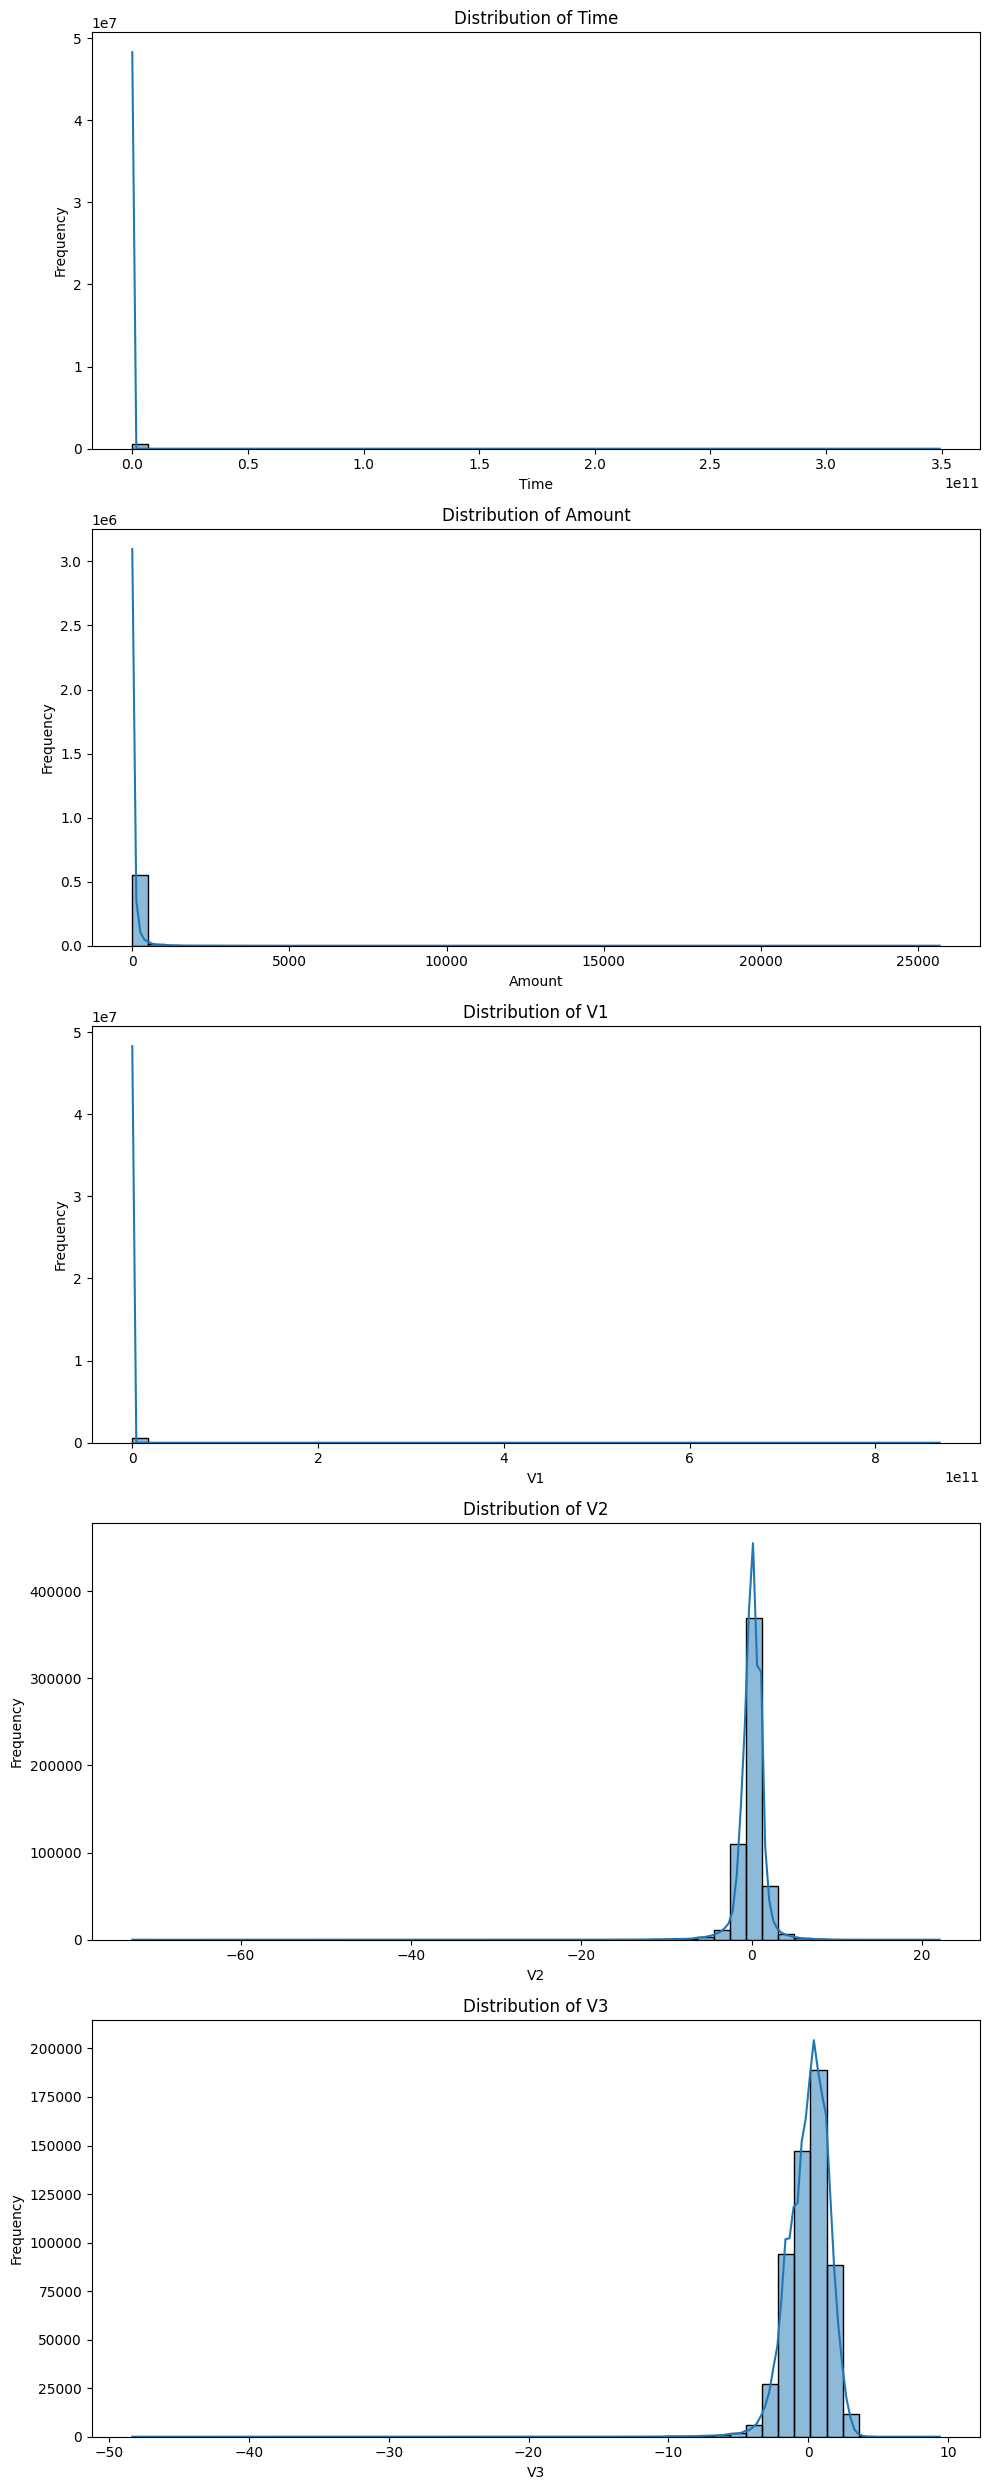

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few key features for visualization
features_to_plot = ['Time', 'Amount', 'V1', 'V2', 'V3']

# Create subplots
fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(10, 5 * len(features_to_plot)))

# Plot histograms for each selected feature
for i, feature in enumerate(features_to_plot):
    sns.histplot(df[feature], kde=True, ax=axes[i], bins=50)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [51]:
print("Number of fraudulent and non-fraudulent transactions:")
print(df['Class'].value_counts())

Number of fraudulent and non-fraudulent transactions:
Class
0.0    566576
1.0       982
Name: count, dtype: int64


In [50]:
print("Training Logistic Regression Model...")

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

print("Logistic Regression Model Training Complete.")

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nLogistic Regression Accuracy Score:")
print(accuracy_score(y_test, y_pred_lr))

Training Logistic Regression Model...
Logistic Regression Model Training Complete.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    152986
         1.0       0.07      0.91      0.14       281

    accuracy                           0.98    153267
   macro avg       0.54      0.94      0.56    153267
weighted avg       1.00      0.98      0.99    153267


Logistic Regression Confusion Matrix:
[[149835   3151]
 [    26    255]]

Logistic Regression Accuracy Score:
0.9792714674391748


In [47]:
print("Converting object columns to numeric...")
for col in ['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nNumber of NaN values per column after object to numeric conversion:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())

Converting object columns to numeric...

Number of NaN values per column after object to numeric conversion:
V2      1
V4      2
V5      2
V7      3
V11     6
V13     9
V21    30
V23    38
V25    46
dtype: int64


In [48]:
print("\nNumber of NaN values per column before complete imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Get a list of all columns with NaN values
columns_with_nan = df.columns[df.isnull().any()].tolist()

# Impute NaN values in all identified numeric columns with their median
for col in columns_with_nan:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64': # Ensure it's a numeric column
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("\nNumber of NaN values per column after complete imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Number of NaN values per column before complete imputation:
V2         1
V4         2
V5         2
V6         2
V7         3
V8         2
V9         4
V10        5
V11        6
V12        8
V13        9
V14       10
V15       12
V16       17
V17       18
V18       23
V19       26
V20       26
V21       30
V22       32
V23       38
V24       41
V25       46
V26       50
V27       55
V28       58
Amount    62
Class     66
dtype: int64

Number of NaN values per column after complete imputation:
Series([], dtype: int64)


In [49]:
print("\nDataFrame information after complete NaN imputation:")
df.info()


DataFrame information after complete NaN imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567558 entries, 0 to 567557
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    567558 non-null  float64
 1   V1      567558 non-null  float64
 2   V2      567558 non-null  float64
 3   V3      567558 non-null  float64
 4   V4      567558 non-null  float64
 5   V5      567558 non-null  float64
 6   V6      567558 non-null  float64
 7   V7      567558 non-null  float64
 8   V8      567558 non-null  float64
 9   V9      567558 non-null  float64
 10  V10     567558 non-null  float64
 11  V11     567558 non-null  float64
 12  V12     567558 non-null  float64
 13  V13     567558 non-null  float64
 14  V14     567558 non-null  float64
 15  V15     567558 non-null  float64
 16  V16     567558 non-null  float64
 17  V17     567558 non-null  float64
 18  V18     567558 non-null  float64
 19  V19     567558 non-null  float64

In [43]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Shape of X_train after SMOTE:", X_train_smote.shape)
print("Shape of y_train after SMOTE:", y_train_smote.shape)
print("\nDistribution of 'Class' in y_train after SMOTE:")
print(y_train_smote.value_counts(normalize=True) * 100)

Shape of X_train after SMOTE: (713932, 30)
Shape of y_train after SMOTE: (713932,)

Distribution of 'Class' in y_train after SMOTE:
Class
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


In [41]:
# Scale 'Amount' and 'Time' features
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

print("First 5 rows of the DataFrame after scaling 'Amount' and 'Time':")
display(df.head())

First 5 rows of the DataFrame after scaling 'Amount' and 'Time':


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.001584,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.236033,0.0
1,-0.001584,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.350263,0.0
2,-0.001584,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.149974,0.0
3,-0.001584,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.131807,0.0
4,-0.001584,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.081715,0.0


In [42]:
# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("\nDistribution of 'Class' in y_train:")
print(y_train.value_counts(normalize=True) * 100)
print("\nDistribution of 'Class' in y_test:")
print(y_test.value_counts(normalize=True) * 100)

Shape of X_train: (357622, 30)
Shape of y_train: (357622,)
Shape of X_test: (153267, 30)
Shape of y_test: (153267,)

Distribution of 'Class' in y_train:
Class
0.0    99.816566
1.0     0.183434
Name: proportion, dtype: float64

Distribution of 'Class' in y_test:
Class
0.0    99.81666
1.0     0.18334
Name: proportion, dtype: float64


In [34]:
print("Distribution of the 'Class' column:")
print(df['Class'].value_counts())
print("\nPercentage of fraudulent transactions:")
print(df['Class'].value_counts(normalize=True) * 100)

Distribution of the 'Class' column:
Class
0.0    509952
1.0       937
Name: count, dtype: int64

Percentage of fraudulent transactions:
Class
0.0    99.816594
1.0     0.183406
Name: proportion, dtype: float64


In [35]:
print("Distribution of the 'Class' column:")
print(df['Class'].value_counts())
print("\nPercentage of fraudulent transactions:")
print(df['Class'].value_counts(normalize=True) * 100)

Distribution of the 'Class' column:
Class
0.0    509952
1.0       937
Name: count, dtype: int64

Percentage of fraudulent transactions:
Class
0.0    99.816594
1.0     0.183406
Name: proportion, dtype: float64


In [36]:
print("Distribution of the 'Class' column:")
print(df['Class'].value_counts())
print("\nPercentage of fraudulent transactions:")
print(df['Class'].value_counts(normalize=True) * 100)

Distribution of the 'Class' column:
Class
0.0    509952
1.0       937
Name: count, dtype: int64

Percentage of fraudulent transactions:
Class
0.0    99.816594
1.0     0.183406
Name: proportion, dtype: float64


In [37]:
print("Distribution of the 'Class' column:")
print(df['Class'].value_counts())
print("\nPercentage of fraudulent transactions:")
print(df['Class'].value_counts(normalize=True) * 100)

Distribution of the 'Class' column:
Class
0.0    509952
1.0       937
Name: count, dtype: int64

Percentage of fraudulent transactions:
Class
0.0    99.816594
1.0     0.183406
Name: proportion, dtype: float64


In [25]:
print("Descriptive statistics of the DataFrame:")
df.describe()

Descriptive statistics of the DataFrame:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.108890e+05,5.108890e+05,510889.000000,510889.000000,510889.000000,510889.000000,510887.000000,510889.000000,510887.000000,510885.000000,...,510889.000000,510861.000000,510889.000000,510852.000000,510889.000000,510843.000000,510838.000000,510836.000000,510832.000000,510828.000000
mean,7.735699e+05,1.701238e+06,-0.019116,0.077155,0.018598,-0.031020,0.014648,-0.013660,0.002112,0.000356,...,-0.000395,-0.007208,-0.002207,0.001284,0.016950,0.001457,0.000325,0.001081,90.475866,0.001834
std,4.884335e+08,1.215985e+09,1.666493,1.509657,1.416629,1.373275,1.325985,1.225639,1.193508,1.110560,...,0.830073,0.781099,1.396850,0.612064,0.585970,0.583747,0.852532,0.400102,250.620398,0.042789
min,0.000000e+00,-5.640751e+01,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,5.133700e+04,-9.310047e-01,-0.610704,-0.759044,-0.841601,-0.722317,-0.752435,-0.564278,-0.202976,-0.654467,...,-0.225626,-0.535309,-0.164188,-0.350990,-0.297690,-0.329703,-0.070717,-0.051112,5.990000,0.000000
50%,7.881600e+04,7.042537e-03,0.058769,0.272447,0.006873,-0.087803,-0.255242,0.023649,0.027570,-0.057073,...,-0.030171,0.001756,-0.016512,0.044218,0.044446,-0.058424,0.001929,0.013327,22.990000,0.000000
75%,1.297730e+05,1.276662e+00,0.782606,1.084800,0.783961,0.575783,0.417249,0.551434,0.329998,0.606934,...,0.179615,0.506132,0.138781,0.433969,0.361975,0.246257,0.089114,0.077702,79.500000,0.000000
max,3.491124e+11,8.691436e+11,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,258.830000,179.790000,862.000000,38.970000,184.000000,231.480000,537.280000,159.000000,19656.530000,1.000000


In [26]:
print("Number of NaN values per column before complete imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Get a list of all columns with NaN values
columns_with_nan = df.columns[df.isnull().any()].tolist()

# Impute NaN values in all identified columns with their median
for col in columns_with_nan:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64': # Ensure it's a numeric column
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("\nNumber of NaN values per column after complete imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Number of NaN values per column before complete imputation:
V6         2
V8         2
V9         4
V10        5
V12        8
V14       10
V15       12
V16       16
V17       16
V18       20
V19       22
V20       22
V22       28
V24       37
V26       46
V27       51
V28       53
Amount    57
Class     61
dtype: int64


/tmp/ipython-input-2681770266.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)



Number of NaN values per column after complete imputation:
Series([], dtype: int64)


In [27]:
print("\nDataFrame information after complete NaN imputation:")
df.info()


DataFrame information after complete NaN imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510889 entries, 0 to 510888
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    510889 non-null  float64
 1   V1      510889 non-null  float64
 2   V2      510889 non-null  float64
 3   V3      510889 non-null  float64
 4   V4      510889 non-null  float64
 5   V5      510889 non-null  float64
 6   V6      510889 non-null  float64
 7   V7      510889 non-null  float64
 8   V8      510889 non-null  float64
 9   V9      510889 non-null  float64
 10  V10     510889 non-null  float64
 11  V11     510889 non-null  float64
 12  V12     510889 non-null  float64
 13  V13     510889 non-null  float64
 14  V14     510889 non-null  float64
 15  V15     510889 non-null  float64
 16  V16     510889 non-null  float64
 17  V17     510889 non-null  float64
 18  V18     510889 non-null  float64
 19  V19     510889 non-null  float64

In [28]:
print("Number of NaN values per column before complete imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Get a list of all columns with NaN values
columns_with_nan = df.columns[df.isnull().any()].tolist()

# Impute NaN values in all identified columns with their median
for col in columns_with_nan:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64': # Ensure it's a numeric column
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("\nNumber of NaN values per column after complete imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Number of NaN values per column before complete imputation:
Series([], dtype: int64)

Number of NaN values per column after complete imputation:
Series([], dtype: int64)


In [29]:
print("\nDataFrame information after complete NaN imputation:")
df.info()


DataFrame information after complete NaN imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510889 entries, 0 to 510888
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    510889 non-null  float64
 1   V1      510889 non-null  float64
 2   V2      510889 non-null  float64
 3   V3      510889 non-null  float64
 4   V4      510889 non-null  float64
 5   V5      510889 non-null  float64
 6   V6      510889 non-null  float64
 7   V7      510889 non-null  float64
 8   V8      510889 non-null  float64
 9   V9      510889 non-null  float64
 10  V10     510889 non-null  float64
 11  V11     510889 non-null  float64
 12  V12     510889 non-null  float64
 13  V13     510889 non-null  float64
 14  V14     510889 non-null  float64
 15  V15     510889 non-null  float64
 16  V16     510889 non-null  float64
 17  V17     510889 non-null  float64
 18  V18     510889 non-null  float64
 19  V19     510889 non-null  float64

In [30]:
print("Number of NaN values per column before complete imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Get a list of all columns with NaN values
columns_with_nan = df.columns[df.isnull().any()].tolist()

# Impute NaN values in all identified numeric columns with their median
for col in columns_with_nan:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64': # Ensure it's a numeric column
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("\nNumber of NaN values per column after complete imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Number of NaN values per column before complete imputation:
Series([], dtype: int64)

Number of NaN values per column after complete imputation:
Series([], dtype: int64)


In [31]:
print("\nDataFrame information after complete NaN imputation:")
df.info()


DataFrame information after complete NaN imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510889 entries, 0 to 510888
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    510889 non-null  float64
 1   V1      510889 non-null  float64
 2   V2      510889 non-null  float64
 3   V3      510889 non-null  float64
 4   V4      510889 non-null  float64
 5   V5      510889 non-null  float64
 6   V6      510889 non-null  float64
 7   V7      510889 non-null  float64
 8   V8      510889 non-null  float64
 9   V9      510889 non-null  float64
 10  V10     510889 non-null  float64
 11  V11     510889 non-null  float64
 12  V12     510889 non-null  float64
 13  V13     510889 non-null  float64
 14  V14     510889 non-null  float64
 15  V15     510889 non-null  float64
 16  V16     510889 non-null  float64
 17  V17     510889 non-null  float64
 18  V18     510889 non-null  float64
 19  V19     510889 non-null  float64

In [32]:
print("Number of NaN values per column before complete imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Get a list of all columns with NaN values
columns_with_nan = df.columns[df.isnull().any()].tolist()

# Impute NaN values in all identified numeric columns with their median
for col in columns_with_nan:
    # Ensure it's a numeric column before imputing with median
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("\nNumber of NaN values per column after complete imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Number of NaN values per column before complete imputation:
Series([], dtype: int64)

Number of NaN values per column after complete imputation:
Series([], dtype: int64)


In [33]:
print("\nDataFrame information after complete NaN imputation:")
df.info()


DataFrame information after complete NaN imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510889 entries, 0 to 510888
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    510889 non-null  float64
 1   V1      510889 non-null  float64
 2   V2      510889 non-null  float64
 3   V3      510889 non-null  float64
 4   V4      510889 non-null  float64
 5   V5      510889 non-null  float64
 6   V6      510889 non-null  float64
 7   V7      510889 non-null  float64
 8   V8      510889 non-null  float64
 9   V9      510889 non-null  float64
 10  V10     510889 non-null  float64
 11  V11     510889 non-null  float64
 12  V12     510889 non-null  float64
 13  V13     510889 non-null  float64
 14  V14     510889 non-null  float64
 15  V15     510889 non-null  float64
 16  V16     510889 non-null  float64
 17  V17     510889 non-null  float64
 18  V18     510889 non-null  float64
 19  V19     510889 non-null  float64

In [15]:
print("Number of NaN values before imputation:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())

for col in ['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("\nNumber of NaN values after imputation:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())

Number of NaN values before imputation:
V2      1
V4      2
V5      2
V7      3
V11     6
V13     9
V21    26
V23    33
V25    42
dtype: int64

Number of NaN values after imputation:
V2     0
V4     0
V5     0
V7     0
V11    0
V13    0
V21    0
V23    0
V25    0
dtype: int64


/tmp/ipython-input-521117384.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [16]:
print("\nDataFrame information after imputation:")
df.info()


DataFrame information after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510889 entries, 0 to 510888
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    510889 non-null  float64
 1   V1      510889 non-null  float64
 2   V2      510889 non-null  float64
 3   V3      510889 non-null  float64
 4   V4      510889 non-null  float64
 5   V5      510889 non-null  float64
 6   V6      510887 non-null  float64
 7   V7      510889 non-null  float64
 8   V8      510887 non-null  float64
 9   V9      510885 non-null  float64
 10  V10     510884 non-null  float64
 11  V11     510889 non-null  float64
 12  V12     510881 non-null  float64
 13  V13     510889 non-null  float64
 14  V14     510879 non-null  float64
 15  V15     510877 non-null  float64
 16  V16     510873 non-null  float64
 17  V17     510873 non-null  float64
 18  V18     510869 non-null  float64
 19  V19     510867 non-null  float64
 20  V20    

In [17]:
print("Number of NaN values per column before imputation:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())

# Impute NaN values with the median of each column
for col in ['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("\nNumber of NaN values per column after imputation:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())

Number of NaN values per column before imputation:
V2     0
V4     0
V5     0
V7     0
V11    0
V13    0
V21    0
V23    0
V25    0
dtype: int64

Number of NaN values per column after imputation:
V2     0
V4     0
V5     0
V7     0
V11    0
V13    0
V21    0
V23    0
V25    0
dtype: int64


/tmp/ipython-input-3397274288.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [18]:
print("\nDataFrame information after NaN imputation:")
df.info()


DataFrame information after NaN imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510889 entries, 0 to 510888
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    510889 non-null  float64
 1   V1      510889 non-null  float64
 2   V2      510889 non-null  float64
 3   V3      510889 non-null  float64
 4   V4      510889 non-null  float64
 5   V5      510889 non-null  float64
 6   V6      510887 non-null  float64
 7   V7      510889 non-null  float64
 8   V8      510887 non-null  float64
 9   V9      510885 non-null  float64
 10  V10     510884 non-null  float64
 11  V11     510889 non-null  float64
 12  V12     510881 non-null  float64
 13  V13     510889 non-null  float64
 14  V14     510879 non-null  float64
 15  V15     510877 non-null  float64
 16  V16     510873 non-null  float64
 17  V17     510873 non-null  float64
 18  V18     510869 non-null  float64
 19  V19     510867 non-null  float64
 20  V20

In [19]:
print("Number of NaN values per column before imputation:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())

# Impute NaN values with the median of each column
for col in ['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("\nNumber of NaN values per column after imputation:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())

Number of NaN values per column before imputation:
V2     0
V4     0
V5     0
V7     0
V11    0
V13    0
V21    0
V23    0
V25    0
dtype: int64

Number of NaN values per column after imputation:
V2     0
V4     0
V5     0
V7     0
V11    0
V13    0
V21    0
V23    0
V25    0
dtype: int64


/tmp/ipython-input-3397274288.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [20]:
print("\nDataFrame information after NaN imputation:")
df.info()


DataFrame information after NaN imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510889 entries, 0 to 510888
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    510889 non-null  float64
 1   V1      510889 non-null  float64
 2   V2      510889 non-null  float64
 3   V3      510889 non-null  float64
 4   V4      510889 non-null  float64
 5   V5      510889 non-null  float64
 6   V6      510887 non-null  float64
 7   V7      510889 non-null  float64
 8   V8      510887 non-null  float64
 9   V9      510885 non-null  float64
 10  V10     510884 non-null  float64
 11  V11     510889 non-null  float64
 12  V12     510881 non-null  float64
 13  V13     510889 non-null  float64
 14  V14     510879 non-null  float64
 15  V15     510877 non-null  float64
 16  V16     510873 non-null  float64
 17  V17     510873 non-null  float64
 18  V18     510869 non-null  float64
 19  V19     510867 non-null  float64
 20  V20

In [21]:
print("Number of NaN values per column before imputation:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())

# Impute NaN values with the median of each column
for col in ['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("\nNumber of NaN values per column after imputation:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())

Number of NaN values per column before imputation:
V2     0
V4     0
V5     0
V7     0
V11    0
V13    0
V21    0
V23    0
V25    0
dtype: int64

Number of NaN values per column after imputation:
V2     0
V4     0
V5     0
V7     0
V11    0
V13    0
V21    0
V23    0
V25    0
dtype: int64


/tmp/ipython-input-3397274288.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [22]:
print("\nDataFrame information after NaN imputation:")
df.info()


DataFrame information after NaN imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510889 entries, 0 to 510888
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    510889 non-null  float64
 1   V1      510889 non-null  float64
 2   V2      510889 non-null  float64
 3   V3      510889 non-null  float64
 4   V4      510889 non-null  float64
 5   V5      510889 non-null  float64
 6   V6      510887 non-null  float64
 7   V7      510889 non-null  float64
 8   V8      510887 non-null  float64
 9   V9      510885 non-null  float64
 10  V10     510884 non-null  float64
 11  V11     510889 non-null  float64
 12  V12     510881 non-null  float64
 13  V13     510889 non-null  float64
 14  V14     510879 non-null  float64
 15  V15     510877 non-null  float64
 16  V16     510873 non-null  float64
 17  V17     510873 non-null  float64
 18  V18     510869 non-null  float64
 19  V19     510867 non-null  float64
 20  V20

In [23]:
print("Number of NaN values per column before imputation:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())

# Impute NaN values with the median of each column
for col in ['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("\nNumber of NaN values per column after imputation:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())

Number of NaN values per column before imputation:
V2     0
V4     0
V5     0
V7     0
V11    0
V13    0
V21    0
V23    0
V25    0
dtype: int64

Number of NaN values per column after imputation:
V2     0
V4     0
V5     0
V7     0
V11    0
V13    0
V21    0
V23    0
V25    0
dtype: int64


/tmp/ipython-input-3397274288.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [24]:
print("\nDataFrame information after NaN imputation:")
df.info()


DataFrame information after NaN imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510889 entries, 0 to 510888
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    510889 non-null  float64
 1   V1      510889 non-null  float64
 2   V2      510889 non-null  float64
 3   V3      510889 non-null  float64
 4   V4      510889 non-null  float64
 5   V5      510889 non-null  float64
 6   V6      510887 non-null  float64
 7   V7      510889 non-null  float64
 8   V8      510887 non-null  float64
 9   V9      510885 non-null  float64
 10  V10     510884 non-null  float64
 11  V11     510889 non-null  float64
 12  V12     510881 non-null  float64
 13  V13     510889 non-null  float64
 14  V14     510879 non-null  float64
 15  V15     510877 non-null  float64
 16  V16     510873 non-null  float64
 17  V17     510873 non-null  float64
 18  V18     510869 non-null  float64
 19  V19     510867 non-null  float64
 20  V20

In [8]:
for col in ['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
print("\nDataFrame information after converting object columns:")
df.info()


DataFrame information after converting object columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510889 entries, 0 to 510888
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    510889 non-null  float64
 1   V1      510889 non-null  float64
 2   V2      510888 non-null  float64
 3   V3      510889 non-null  float64
 4   V4      510887 non-null  float64
 5   V5      510887 non-null  float64
 6   V6      510887 non-null  float64
 7   V7      510886 non-null  float64
 8   V8      510887 non-null  float64
 9   V9      510885 non-null  float64
 10  V10     510884 non-null  float64
 11  V11     510883 non-null  float64
 12  V12     510881 non-null  float64
 13  V13     510880 non-null  float64
 14  V14     510879 non-null  float64
 15  V15     510877 non-null  float64
 16  V16     510873 non-null  float64
 17  V17     510873 non-null  float64
 18  V18     510869 non-null  float64
 19  V19     510867 non-null  float

In [10]:
print("\nNumber of NaN values per column after conversion:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())


Number of NaN values per column after conversion:
V2      1
V4      2
V5      2
V7      3
V11     6
V13     9
V21    26
V23    33
V25    42
dtype: int64


In [11]:
for col in ['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
print("\nDataFrame information after converting object columns:")
df.info()


DataFrame information after converting object columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510889 entries, 0 to 510888
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    510889 non-null  float64
 1   V1      510889 non-null  float64
 2   V2      510888 non-null  float64
 3   V3      510889 non-null  float64
 4   V4      510887 non-null  float64
 5   V5      510887 non-null  float64
 6   V6      510887 non-null  float64
 7   V7      510886 non-null  float64
 8   V8      510887 non-null  float64
 9   V9      510885 non-null  float64
 10  V10     510884 non-null  float64
 11  V11     510883 non-null  float64
 12  V12     510881 non-null  float64
 13  V13     510880 non-null  float64
 14  V14     510879 non-null  float64
 15  V15     510877 non-null  float64
 16  V16     510873 non-null  float64
 17  V17     510873 non-null  float64
 18  V18     510869 non-null  float64
 19  V19     510867 non-null  float

In [13]:
print("\nNumber of NaN values per column after conversion:")
print(df[['V2', 'V4', 'V5', 'V7', 'V11', 'V13', 'V21', 'V23', 'V25']].isnull().sum())


Number of NaN values per column after conversion:
V2      1
V4      2
V5      2
V7      3
V11     6
V13     9
V21    26
V23    33
V25    42
dtype: int64


In [28]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,"Time,""V1"",""V2"",""V3"",""V4"",""V5"",""V6"",""V7"",""V8"",""V9"",""V10"",""V11"",""V12"",""V13"",""V14"",""V15"",""V16"",""V17"",""V18"",""V19"",""V20"",""V21"",""V22"",""V23"",""V24"",""V25"",""V26"",""V27"",""V28"",""Amount"",""Class"""
0,"0,-1.3598071336738,-0.0727811733098497,2.53634..."
1,"0,1.19185711131486,0.26615071205963,0.16648011..."
2,"1,-1.35835406159823,-1.34016307473609,1.773209..."
3,"1,-0.966271711572087,-0.185226008082898,1.7929..."
4,"2,-1.15823309349523,0.877736754848451,1.548717..."


In [5]:
# Import pandas if not already imported
import pandas as pd

# Load the dataset with the correct separator and engine, skipping bad lines
df = pd.read_csv("creditcard.csv", sep=',', engine='python', on_bad_lines='skip')

In [45]:
print("First 5 rows of the dataset after correction:")
display(df.head())

First 5 rows of the dataset after correction:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.0727811733098497,2.536347,1.37815522427443,-0.338320769942518,0.462388,0.239598554061257,0.098698,0.363787,...,-0.018306777944153,0.277838,-0.110473910188767,0.066928,0.128539358273528,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.26615071205963,0.166480,0.448154078460911,0.0600176492822243,-0.082361,-0.0788029833323113,0.085102,-0.255425,...,-0.225775248033138,-0.638672,0.101288021253234,-0.339846,0.167170404418143,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.34016307473609,1.773209,0.379779593034328,-0.503198133318193,1.800499,0.791460956450422,0.247676,-1.514654,...,0.247998153469754,0.771679,0.909412262347719,-0.689281,-0.327641833735251,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226008082898,1.792993,-0.863291275036453,-0.0103088796030823,1.247203,0.23760893977178,0.377436,-1.387024,...,-0.108300452035545,0.005274,-0.190320518742841,-1.175575,0.647376034602038,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877736754848451,1.548718,0.403033933955121,-0.407193377311653,0.095921,0.592940745385545,-0.270533,0.817739,...,-0.00943069713232919,0.798278,-0.137458079619063,0.141267,-0.206009587619756,0.502292,0.219422,0.215153,69.99,0.0


In [46]:
print("\nDataFrame information after correction (data types, non-null counts):")
df.info()


DataFrame information after correction (data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567558 entries, 0 to 567557
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    567558 non-null  float64
 1   V1      567558 non-null  float64
 2   V2      567558 non-null  object 
 3   V3      567558 non-null  float64
 4   V4      567557 non-null  object 
 5   V5      567557 non-null  object 
 6   V6      567556 non-null  float64
 7   V7      567556 non-null  object 
 8   V8      567556 non-null  float64
 9   V9      567554 non-null  float64
 10  V10     567553 non-null  float64
 11  V11     567553 non-null  object 
 12  V12     567550 non-null  float64
 13  V13     567550 non-null  object 
 14  V14     567548 non-null  float64
 15  V15     567546 non-null  float64
 16  V16     567541 non-null  float64
 17  V17     567540 non-null  float64
 18  V18     567535 non-null  float64
 19  V19     567532 

In [ ]:
print("First 5 rows of the dataset:")
display(df.head())

In [ ]:
print("\nDataFrame information (data types, non-null counts):")
df.info()

In [29]:
print("\nDataFrame information (data types, non-null counts):")
df.info()


DataFrame information (data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423973 entries, 0 to 423972
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                Non-Null Count   Dtype 
---  ------                                                                                                                                                                                --------------   ----- 
 0   Time,"V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"  423973 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB
